In [119]:
import pickle
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = open('../../scraping/iihs_crashratings/iihsratings2017', 'rb')
iihs_rating = pickle.load(file)

In [6]:
file = open('../../scraping/iihs_death/iihsdeath2017', 'rb')
iihs_deaths = pickle.load(file)

In [12]:
iihs_join_raw = iihs_deaths.join(iihs_rating, lsuffix='_l', rsuffix='_r')
iihs_join = iihs_join_raw[['death_rate','small_overlap_driver','curb_weight']]

In [26]:
iihs_join['curb_weight'] = iihs_join['curb_weight'].apply(lambda x: x.replace(',',''))

In [30]:
iihs_join = iihs_join.dropna()
iihs_join = iihs_join.astype({'death_rate':'int64', 'curb_weight':'int64'})
iihs_join.dtypes

death_rate               int64
small_overlap_driver    object
curb_weight              int64
dtype: object

In [114]:
dummy_iihs = pd.get_dummies(iihs_join)

In [131]:
X = pd.get_dummies(iihs_join[['curb_weight','small_overlap_driver']])
y = iihs_join['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [132]:
model = RidgeCV()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.28143932847461484

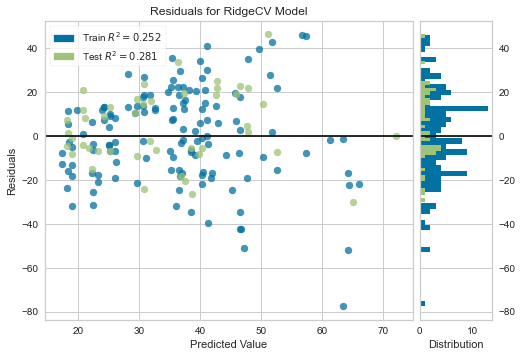

<AxesSubplot:title={'center':'Residuals for RidgeCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [133]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure